In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
in_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    in_city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if in_city not in in_cities:
        in_cities.append(in_city)

# Print the city count to confirm sufficient count
len(in_cities)

625

In [134]:
in_cities = ["austin", "houston", "trontsrad;", "dallas", "fort worth"]
startmsg = "Begining Data Retrieval"
endmsg = "Data Retrieval Complete"
dashes = "-----------------------------"


In [142]:
out_cities = []   
count = 0
print(startmsg + "\n" + dashes)
for in_city in in_cities:
    r = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "appid": api_key,
        "q": in_city,
        "units": "Imperial"
        })
    count += 1
    percentmsg = str(((count) / len(in_cities)) * 100) +"% Complete"
    
    if r.status_code == 200:
        out_city = r.json()
        out_cities.append(out_city)
        print("Processing Data for City: " + out_city["name"] + " | " + str(out_city["id"]) + " | " + percentmsg)
        

    else:
        print("*** City Not Found. Skipping | " + percentmsg + " ***")
        
print(dashes + "\n" + endmsg + "\n" + dashes)
    

Begining Data Retrieval
-----------------------------
Processing Data for City: Austin | 4671654 | 20.0% Complete
Processing Data for City: Houston | 4699066 | 40.0% Complete
*** City Not Found. Skipping | 60.0% Complete ***
Processing Data for City: Dallas | 4684888 | 80.0% Complete
Processing Data for City: Fort Worth | 4691930 | 100.0% Complete
-----------------------------
Data Retrieval Complete
-----------------------------


In [143]:
pd.DataFrame(out_cities)
cleaned_out_cities = [{
    "name": d["name"],
    "max temp": d["main"]["temp_max"],
    "cloudiness": d["clouds"]["all"],
    "country": d["sys"]["country"],
    "date": pd.to_datetime(d["dt"],unit='s'),
    "humidity": d["main"]["humidity"],
    "lat": d["coord"]["lat"],
    "long": d["coord"]["lon"],
    "wind spd": d["wind"]["speed"]
} for d in out_cities]
weather_data= pd.DataFrame(cleaned_out_cities)

In [144]:
weather_data

,name,max temp,cloudiness,country,date,humidity,lat,long,wind spd
0,Austin,60.01,1,US,2020-01-06 04:06:20,44,30.27,-97.74,7.99
1,Houston,61.00,1,US,2020-01-06 04:05:07,59,29.76,-95.37,8.05
2,Dallas,54.00,1,US,2020-01-06 04:06:56,46,32.78,-96.80,8.01
3,Fort Worth,54.00,1,US,2020-01-06 04:06:04,62,32.75,-97.33,5.82


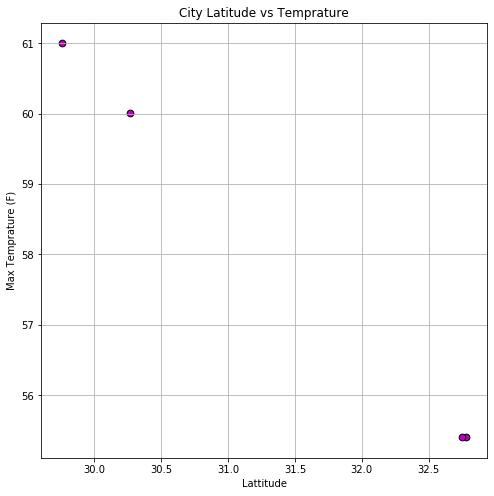

In [105]:
tempplt = weather_data.plot.scatter( x = "lat", y = "max temp", grid = True, figsize=(8,8), \
                                   s = 45, c = "m", edgecolors = "k", \
                                   title = "City Latitude vs Temprature"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Max Temprature (F)")
plt.show()

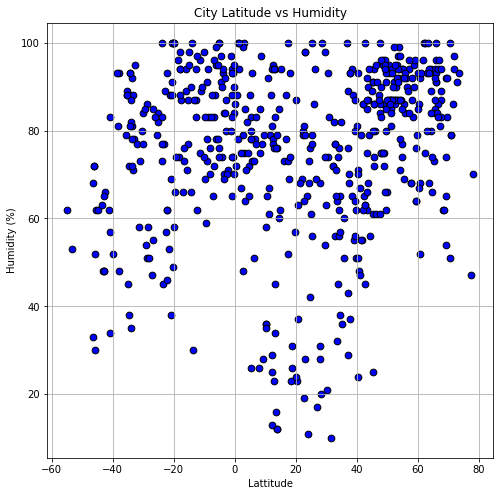

In [90]:
tempplt = weather_data.plot.scatter( x = "lat", y = "humidity", grid = True, figsize=(8,8), \
                                   s = 45, c = "b", edgecolors = "k", \
                                   title = "City Latitude vs Humidity"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Humidity (%)")
plt.show()

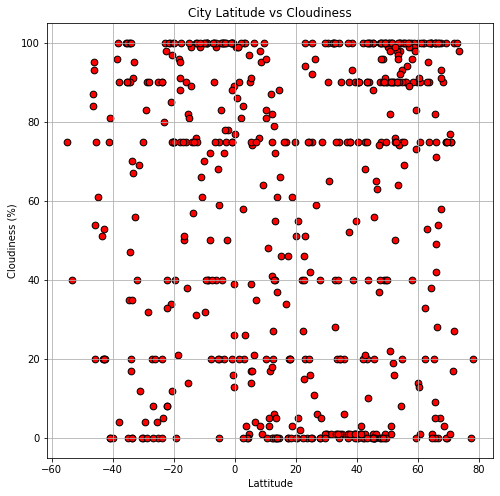

In [91]:
tempplt = weather_data.plot.scatter( x = "lat", y = "cloudiness", grid = True, figsize=(8,8), \
                                   s = 45, c = "r", edgecolors = "k", \
                                   title = "City Latitude vs Cloudiness"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Cloudiness (%)")
plt.show()

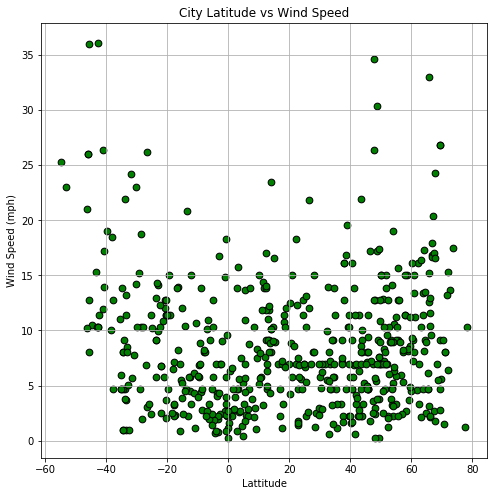

In [92]:
tempplt = weather_data.plot.scatter( x = "lat", y = "wind spd", grid = True, figsize=(8,8), \
                                   s = 45, c = "g", edgecolors = "k", \
                                   title = "City Latitude vs Wind Speed"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Wind Speed (mph)")
plt.show()